# Understanding Descriptive Statistics

Import the necessary libraries here:

In [7]:
# Libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [8]:
# your code here
dice_simulation=[]
for i in range(10):
    roll=random.choice([1,2,3,4,5,6])
    dice_simulation.append(roll)
    
df = pd.DataFrame(dice_simulation, columns=['roll'])
df.describe()

,roll
count,10.000000
mean,3.200000
std,1.619328
min,1.000000
25%,2.000000
50%,3.500000
75%,4.750000
max,5.000000


#### 2.- Plot the results sorted by value.

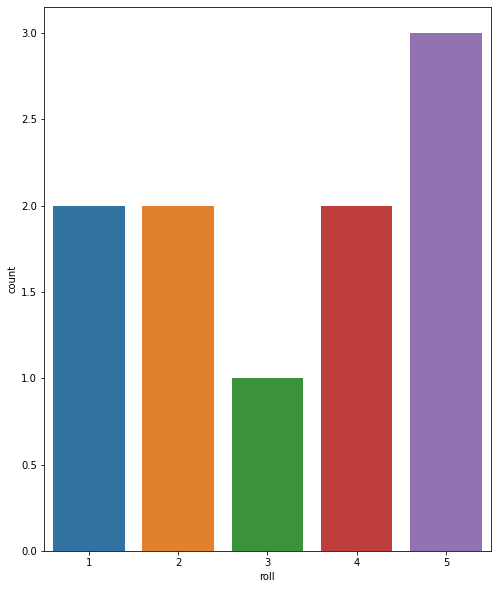

In [9]:
# your code here

#sns.distplot(df_ordered, bins=10, order=['1','2','3','4','5','6']);
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
sns.countplot('roll',data=df)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

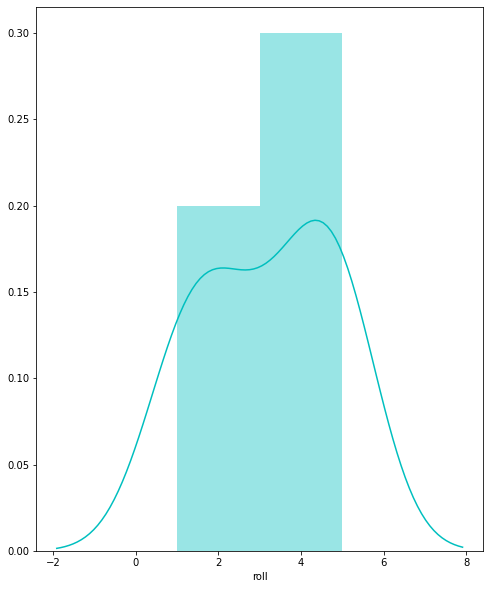

In [10]:
# your code here
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
sns.distplot(df['roll'],color='c')

In [ ]:
"""
your comments here
Basically what you can see is that the histogram groups the 6 options in a single block, 
clearly showing where the number with the most presence is.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
# your code here
def mean(df):
    return sum(df['roll'])/10
 

mean(df)

3.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [12]:
# your code here
def freq_med (df):
    df1 = df['roll'].value_counts().reset_index().sort_values('index').reset_index(drop=True)
    df1['XiFi']=df1['roll']*df1['index']
    df1 = df1.append(df1.sum().rename("Total"))
    return df1.iloc[5]['XiFi']/df1.iloc[5]['roll']

freq_med(df)


3.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [13]:
# your code here
def median_mean(df):
    df1 = df['roll'].value_counts().reset_index().sort_values('index').reset_index(drop=True)
    return (len(df1)+2)/2

median_mean(df)

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [14]:
# your code here
def quantiles(df):
    df1 = df['roll'].value_counts().reset_index().sort_values('index').reset_index(drop=True)
    df1 = df1.append(df1.sum().rename("Total"))
    q1=(df1.iloc[5]['roll']-1)/4
    q2=(len(df1)+2)/2
    q3=(df1.iloc[5]['roll'])/2
    q4=len(df1)
    return q1,q2,q3,q4

quantiles(df)

(2.25, 4.0, 5.0, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

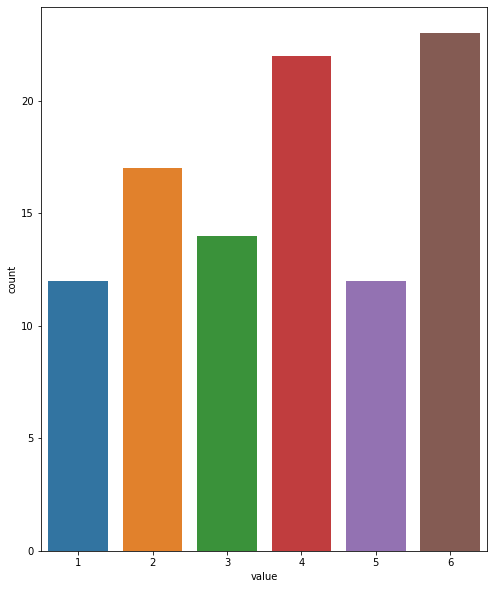

In [15]:
# your code here
df2=pd.read_csv('../data/roll_the_dice_hundred.csv')

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
sns.countplot('value',data=df2)


In [ ]:
"""
your comments here

"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [16]:
# your code here
def mean(df):
    return sum(df['value'])/100
 
mean(df2)

3.74

In [18]:
def freq_med (df): 
    df3 = df2['value'].value_counts().reset_index().sort_values('index').reset_index(drop=True)
    df3['XiFi']=df3['value']*df3['index']
    df3 = df3.append(df3.sum().rename("Total"))
    return df3.iloc[6]['XiFi']/df3.iloc[6]['value']

freq_med(df2)

3.74

#### 3.- Now, calculate the frequency distribution.


In [19]:
# your code here
df3 = df2['value'].value_counts().reset_index().sort_values('index').reset_index(drop=True)

df3

,index,value
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

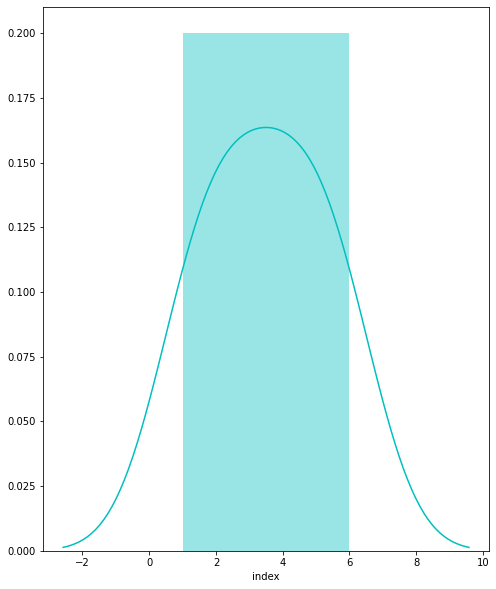

In [22]:
# your code here
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
sns.distplot(df3['index'],color='c')

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

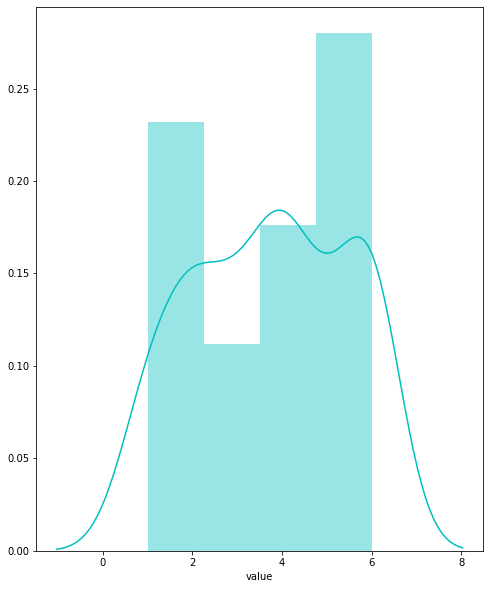

In [23]:
# your code here
df4=pd.read_csv('../data/roll_the_dice_hundred.csv')

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
sns.distplot(df4['value'],color='c')

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


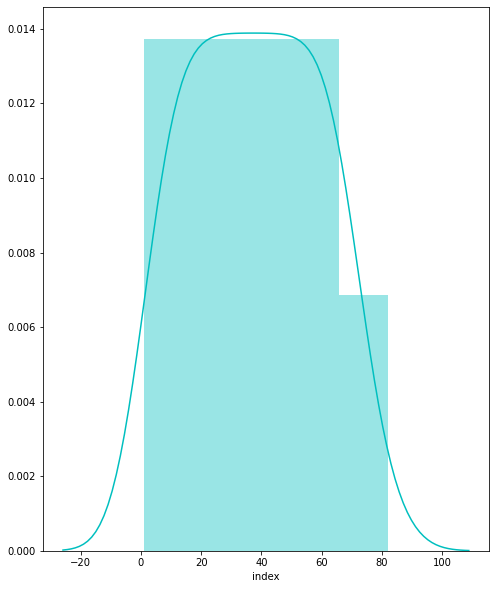

In [24]:
# your code here
df=pd.read_csv('../data/ages_population.csv')

df1 = df['observation'].value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1['XiFi']=df1['observation']*df1['index']
#df1 = df1.append(df1.sum().rename("Total"))
#c=df1.loc['Total']['XiFi']/df1.loc['Total']['observation']
#df1
#c
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
sns.distplot(df1['index'],color='c')
df.describe()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [25]:
# your code here
df_mean = df['observation'].mean()
print(f'The mean is: {df_mean}')

df_std=df['observation'].std()
print(f'The standard deviation is: {df_std}')


The mean is: 36.56
The standard deviation is: 12.81649962597677


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


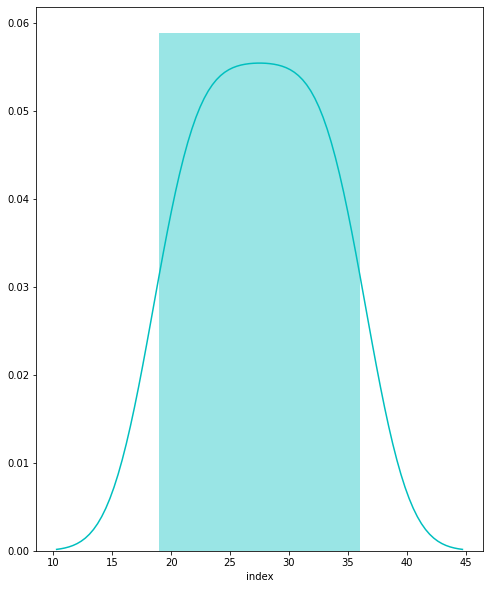

In [26]:
# your code here
df=pd.read_csv('../data/ages_population2.csv')
df1 = df['observation'].value_counts().reset_index().sort_values('index').reset_index(drop=True)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
sns.distplot(df1['index'],color='c')

df.describe()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [27]:
# your code here
df_mean = df['observation'].mean()
print(f'The mean is: {df_mean}')

df_std=df['observation'].std()
print(f'The standard deviation is: {df_std}')



The mean is: 27.155
The standard deviation is: 2.9698139326891835


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


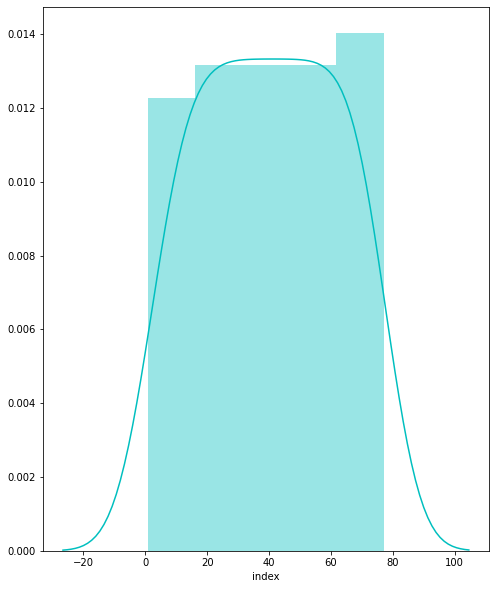

In [28]:
# your code here
df=pd.read_csv('../data/ages_population3.csv')
df1 = df['observation'].value_counts().reset_index().sort_values('index').reset_index(drop=True)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
sns.distplot(df1['index'],color='c')

df.describe()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [29]:
# your code here
df_mean = df['observation'].mean()
print(f'The mean is: {df_mean}')

df_std=df['observation'].std()
print(f'The standard deviation is: {df_std}')


The mean is: 41.989
The standard deviation is: 16.14470595986593


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [30]:
# your code here
s=np.sort(df['observation'].unique())

def find_median(sorted_list):
    indices = []

    list_size = len(sorted_list)
    median = 0

    if list_size % 2 == 0:
        indices.append(int(list_size / 2) - 1)  # -1 because index starts from 0
        indices.append(int(list_size / 2))

        median = (sorted_list[indices[0]] + sorted_list[indices[1]]) / 2
        pass
    else:
        indices.append(int(list_size / 2))

        median = sorted_list[indices[0]]
        pass

    return median, indices
    pass
    

find_median(s)

(40.0, [37])

In [31]:
df.quantile([0.25,0.5,0.75])

,observation
0.25,30.0
0.50,40.0
0.75,53.0


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [32]:
# your code here
p10 = np.percentile(s,10)
p30 = np.percentile(s,30)
p70 = np.percentile(s,70)
p90 = np.percentile(s,90)

print(p10,p30,p70,p90)


10.4 25.2 54.8 69.60000000000001


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""